# Matrizen_Operationen #

In [3]:
# Initialisierung
import numpy as np
import sympy as sym
import scipy.linalg as sp

# eigene Funktionen
def eliminate(Aa_in, tolerance=np.finfo(float).eps*10., fix=False, verbos=0):
    # eliminates first row
    # assumes Aa is np.array, As.shape>(1,1)
    Aa = Aa_in
    Nn = len(Aa)
    # Mm = len(Aa[0,:])
    if (Nn < 2):
        return Aa
    else:
        if not fix:
            prof = np.argsort(np.abs(Aa_in[:, 0]))
            Aa = Aa[prof[::-1]]
        if np.abs(Aa[0, 0]) > tolerance:
            el = np.eye(Nn)
            el[0:Nn, 0] = -Aa[:, 0] / Aa[0, 0]
            el[0, 0] = 1.0 / Aa[0, 0]
            if (verbos > 50):
                print('Aa \n', Aa)
                print('el \n', el)
                print('pr \n', np.matmul(el, Aa))
            return np.matmul(el, Aa)
        else:
            return Aa


def FirstNonZero(lis):
    return next((i for i, x in enumerate(lis) if x), len(lis)-1)


def SortRows(Aa):
    inx = np.array(list(map(FirstNonZero, Aa)))
    #print('inx: ',inx,inx.argsort())
    return Aa[inx.argsort()]


def mrref(Aa_in, verbos=0):
    Aa = Aa_in*1.0
    Nn = len(Aa)
    kklist = np.arange(0, Nn - 1)
    #print('kklist', kklist)
    for kk in kklist:
        Aa[kk:, kk:] = eliminate(Aa[kk:, kk:], verbos=verbos-1)
    Aa = SortRows(Aa)
    Aa = np.flipud(Aa)
    # for kk in kklist:
    for kkh in kklist:
        kk = FirstNonZero(Aa[kkh, :])
        Aa[kkh::, kk::] = eliminate(Aa[kkh::, kk::], fix=True, verbos=verbos-1)
    return np.flipud(Aa)


def mnull(Aa_in,leps=np.finfo(float).eps*10,verbos=0):
    Aa=mrref(Aa_in) 
    Aa=Aa[list(map(np.linalg.norm,Aa  ))>leps] # extract non-zero linies
    mpiv=np.array(Aa[0]*0,dtype=bool)
    jj=0 # setup mask, indicating pivot-variables
    for ro in Aa>leps:
        for x in ro[jj:]:
            if x:
                mpiv[jj]=True
                jj=jj+1
                break
    
    jj=0 ; la=Aa[:,mpiv] ; veo=[]
    for jj in  np.argwhere(mpiv==False): 
        ve=np.linalg.lstsq(la, -Aa[:,jj],rcond=None)[0]
        vel=np.zeros((len(mpiv)))
        vel[mpiv]=ve[:,0] ; vel[jj]=1
        veo.append(vel)
 
    opt=np.array(veo).T
    if (verbos>10):
        print(Aa.shape,opt.shape)
        print('Test: ',np.matmul(Aa,opt))
    return opt

# Lösung Überprüfen #

## Beispiel  ##
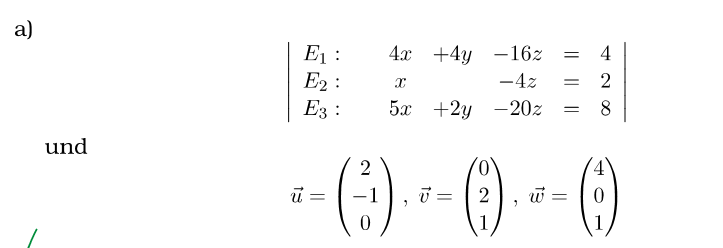

In [12]:
# Die Koeefizienten werden in das LGS_KOFF Array reingeschrieben. Wenn kein Wert vorhanden ist 0 einsetzten. 
LGS_KOFF = np.array([[4,4,-16],
                    [1,0,-4],
                    [5,2,-20]])
# Die Partikuläre Vekotr erstellen (Die Lösungen für die einzelnen Gleichungen)
LGS_PART = np.array([4,2,8])

# Die zu testenden Vektoren erstellen:
u = np.array([[2],
             [-1],
             [0]])

v = np.array([[0],
             [2],
             [1]])

w = np.array([[4],
             [0],
             [1]])


In [13]:
# Alle Vektoren Skalar mit dem LGS Verrechnen:
print('Lösung für den Vektor u:\n', LGS_KOFF @ u)
print('Lösung für den Vektor v:\n', LGS_KOFF @ v)
print('Lösung für den Vektor w:\n', LGS_KOFF @ w)

#Falls der Gleiche Vektor rauskommt wie die Lösungen vom LGS dann ist es eine Partikuläre Lösung
# Falls der 0 Vektor rauskommt haben wir eine Homogene Lösung gefunden
# Bei allen anderen Vektoren als Resultat bedeutet dies dass der Vektor keine Lösung ist vom LGS

Lösung für den Vektor u:
 [[4]
 [2]
 [8]]
Lösung für den Vektor v:
 [[ -8]
 [ -4]
 [-16]]
Lösung für den Vektor w:
 [[0]
 [0]
 [0]]


# Matrizen Rechnungen #